# Exploring and Transforming JSON Schemas - Lab

# Introduction

In this lab, you'll practice exploring a JSON file whose structure and schema is unknown to you. We will provide you with limited information, and you will explore the dataset to answer the specified question.

In [ ]:
## Objectives

You will be able to:

* Use the `json` module to load and parse JSON documents
* Explore and extract data using unknown JSON schemas
* Convert JSON to a pandas dataframe

## Your Task: Create a Bar Graph of the Top 10 States with the Highest Asthma Rates for Adults Age 18+

The information you need to create this graph is located in `disease_data.json`. It contains both data and metadata.

You are given the following codebook/data dictionary:

* The actual data values are associated with the key `'DataValue'`
* The state names are associated with the key `'LocationDesc'`
* To filter to the appropriate records, make sure:
  * The `'Question'` is `'Current asthma prevalence among adults aged >= 18 years'`
  * The `'StratificationCategoryID1'` is `'OVERALL'`
  * The `'DataValueTypeID'` is `'CRDPREV'`
  * The `'LocationDesc'` is not `'United States'`
  
The provided JSON file contains both data and metadata, and you will need to parse the metadata in order to understand the meanings of the values in the data.

No further information about the structure of this file is provided.

## Load the JSON File

Load the data from the file `disease_data.json` into a variable `data`.

In [1]:
# Your code here
import json

with open('disease_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

## Explore the Overall Structure

What is the overall data type of `data`?

In [2]:
# Your code here
data.keys()

dict_keys(['meta', 'data'])

What are the data types associates with those keys?

In [3]:
# Your code here (data)
type(data['data'])

list

In [4]:
# Your code here (metadata)
type(data['meta'])

dict

Perform additional exploration to understand the contents of these values. For dictionaries, what are their keys? For lists, what is the length, and what does the first element look like?

In [5]:
# Inspect the metadata to understand its structure
metadata = data.get('meta', {})
print('Metadata:', metadata)

# Extract the column names from the 'view' key
view_metadata = metadata.get('view', {})
column_names = [col['name'] for col in view_metadata.get('columns', [])]  # Adjust based on actual structure
print('Column Names:', column_names)
print('Number of Columns:', len(column_names))

# Inspect the length of the data list
data_length = len(data['data'])
print(f'Length of data list: {data_length}')

# Inspect the first element of the data list
first_element = data['data'][0]
print('First element of data list:', first_element)

Metadata: {'view': {'id': 'g4ie-h725', 'name': 'U.S. Chronic Disease Indicators (CDI)', 'attribution': 'Centers for Disease Control and Prevention, National Center for Chronic Disease Prevention and Health Promotion, Division of Population Health', 'attributionLink': 'http://www.cdc.gov/nccdphp/dph/', 'averageRating': 0, 'category': 'Chronic Disease Indicators', 'createdAt': 1463517008, 'description': "CDC's Division of Population Health provides cross-cutting set of 124 indicators that were developed by consensus and that allows states and territories and large metropolitan areas to uniformly define, collect, and report chronic disease data that are important to public health practice and available for states, territories and large metropolitan areas. In addition to providing access to state-specific indicator data, the CDI web site serves as a gateway to additional information and data resources.", 'displayType': 'table', 'downloadCount': 80068, 'hideFromCatalog': False, 'hideFromDat

The following code checks that you have the correct column names:

In [6]:
# Run this cell without changes

# 42 total columns
assert len(column_names) == 42

# Each name should be a string, not a dict
assert type(column_names[0]) == str and type(column_names[-1]) == str

# Check that we have some specific strings
assert "DataValue" in column_names
assert "LocationDesc" in column_names
assert "Question" in column_names
assert "StratificationCategoryID1" in column_names
assert "DataValueTypeID" in column_names

## Filter Rows Based on Columns

Recall that we only want to include records where:

* The `'Question'` is `'Current asthma prevalence among adults aged >= 18 years'`
* The `'StratificationCategoryID1'` is `'OVERALL'`
* The `'DataValueTypeID'` is `'CRDPREV'`
* The `'LocationDesc'` is not `'United States'`

Combining knowledge of the data and metadata, filter out the rows of data that are not relevant.

(You may find the `pandas` library useful here.)

In [7]:
# Your code here (add additional cells as needed)
import pandas as pd
import json

# Load the JSON file into a variable
with open('disease_data.json', 'r') as file:
    data = json.load(file)

# Convert the data to a DataFrame
df = pd.DataFrame(data['data'], columns=column_names)  # Ensure column_names is correctly defined

# Apply the filters
filtered_df = df[
    (df['Question'] == 'Current asthma prevalence among adults aged >= 18 years') &
    (df['StratificationCategoryID1'] == 'OVERALL') &
    (df['DataValueTypeID'] == 'CRDPREV') &
    (df['LocationDesc'] != 'United States')
]

# Display the filtered DataFrame
print(filtered_df)


       sid                                    id  position  created_at  \
9371  9369  6BEC61D0-E04B-44BA-8170-F7D6A4C40A09      9369  1527194523   
9372  9370  5D6EDDA9-B241-4498-A262-ED20AB78C44C      9370  1527194523   
9373  9371  5FCE0D49-11FD-4545-B9E7-14F503123105      9371  1527194523   
9374  9372  68F151CE-3084-402C-B672-78A43FBDE287      9372  1527194523   
9375  9373  D3F00ED2-A069-4E40-B42B-5A2528A91B6F      9373  1527194523   
9376  9374  A8B4F198-D388-4663-B82B-936C5FB37428      9374  1527194523   
9377  9375  B2FB1AEA-5E2A-4E7C-9A93-586EA18EBE99      9375  1527194523   
9378  9376  7C5D70DE-DE95-4AAD-A666-2260B5A16363      9376  1527194523   
9379  9377  1893C9A3-C6CE-4F47-A66F-85A4F89F244F      9377  1527194523   
9380  9378  D47614E3-47D4-40D6-AC29-C434C876F3DF      9378  1527194523   
9381  9379  B1F090FC-1E46-467C-8C7D-0B90022A36BB      9379  1527194523   
9382  9380  BFF73DC1-4B7B-43AC-9797-5F244999B94A      9380  1527194523   
9383  9381  35433725-2434-480F-8DA5-7D

You should have 54 records after filtering.

## Extract the Attributes Required for Plotting

For each record, the only information we actually need for the graph is the `'DataValue'` and `'LocationDesc'`. Create a list of records that only contains these two attributes.

Also, make sure that the data values are numbers, not strings.

In [10]:
extracted_data = []
for index, row in filtered_df.iterrows():
    try:
        value = float(row['DataValue'])
    except ValueError:
        value = 0.0
    extracted_data.append({'DataValue': value, 'LocationDesc': row['LocationDesc']})
extracted_data

[{'DataValue': 9.7, 'LocationDesc': 'Alabama'},
 {'DataValue': 8.8, 'LocationDesc': 'Alaska'},
 {'DataValue': 9.4, 'LocationDesc': 'Arizona'},
 {'DataValue': 8.5, 'LocationDesc': 'Arkansas'},
 {'DataValue': 7.8, 'LocationDesc': 'California'},
 {'DataValue': 8.8, 'LocationDesc': 'Colorado'},
 {'DataValue': 10.5, 'LocationDesc': 'Connecticut'},
 {'DataValue': 8.5, 'LocationDesc': 'Delaware'},
 {'DataValue': 9.8, 'LocationDesc': 'District of Columbia'},
 {'DataValue': 6.7, 'LocationDesc': 'Florida'},
 {'DataValue': 8.5, 'LocationDesc': 'Georgia'},
 {'DataValue': 10.7, 'LocationDesc': 'Hawaii'},
 {'DataValue': 9.3, 'LocationDesc': 'Idaho'},
 {'DataValue': 8.9, 'LocationDesc': 'Illinois'},
 {'DataValue': 10.2, 'LocationDesc': 'Indiana'},
 {'DataValue': 7.8, 'LocationDesc': 'Iowa'},
 {'DataValue': 8.8, 'LocationDesc': 'Kansas'},
 {'DataValue': 11.6, 'LocationDesc': 'Kentucky'},
 {'DataValue': 8.3, 'LocationDesc': 'Louisiana'},
 {'DataValue': 12.2, 'LocationDesc': 'Maine'},
 {'DataValue': 9.4

## Find Top 10 States

Sort by `'DataValue'` and limit to the first 10 records.

In [11]:
# Your code here (add additional cells as needed)
# Sort the extracted data by 'DataValue' in descending order
sorted_data = sorted(extracted_data, key=lambda x: x['DataValue'], reverse=True)

# Get the top 10 records
top_10_states = sorted_data[:10]
top_10_states

[{'DataValue': 12.2, 'LocationDesc': 'Maine'},
 {'DataValue': 11.8, 'LocationDesc': 'New Mexico'},
 {'DataValue': 11.8, 'LocationDesc': 'West Virginia'},
 {'DataValue': 11.6, 'LocationDesc': 'Kentucky'},
 {'DataValue': 11.4, 'LocationDesc': 'New Hampshire'},
 {'DataValue': 10.9, 'LocationDesc': 'Michigan'},
 {'DataValue': 10.9, 'LocationDesc': 'Tennessee'},
 {'DataValue': 10.7, 'LocationDesc': 'Hawaii'},
 {'DataValue': 10.7, 'LocationDesc': 'Rhode Island'},
 {'DataValue': 10.7, 'LocationDesc': 'Puerto Rico'}]

## Separate the Names and Values for Plotting

Assign the names of the top 10 states to a list-like variable `names`, and the associated values to a list-like variable `values`. Then the plotting code below should work correctly to make the desired bar graph.

In [13]:
names = [state['LocationDesc'] for state in top_10_states]
values = [state['DataValue'] for state in top_10_states]

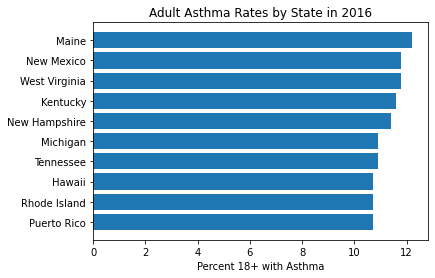

In [14]:
# Run this cell without changes

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.barh(names[::-1], values[::-1]) # Values inverted so highest is at top
ax.set_title('Adult Asthma Rates by State in 2016')
ax.set_xlabel('Percent 18+ with Asthma');

## Summary

In this lab you got some extended practice exploring the structure of JSON files and visualizing data.